<h1><center><b>Proposition d'une application liée à l'alimentation</b></center></h1>
<h2><center><b>Santé publique France</b></center></h2>
<h2><center><b>Notebook d'exploration</b></center></h2>

Nous continuons notre analyse de l'application "NutriCHOICE" dans ce notebook. Tout d'abord, on importe les deux dataframes "data_app" et "score_list".

In [1]:
# Importation des libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('Desktop/Projet_3')

In [2]:
# Importation du dataframe "data_app"

data_app = pd.read_csv('data_app.csv')
data_app = data_app.drop("Unnamed: 0", axis = 1)
data_app

C:\Users\prash\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,code,product_name,brands,allergens,additives,pnns_groups_2,energy-kcal_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts-estimate_100g
0,0000000000100,moutarde au moût de raisin,courte paille,en:mustard,-,Dressings and sauces,223.709369,2.2,29.0,22.0,0.0,5.1,4.60,NaN
1,0000000000949,Salade de carottes râpées,-,-,-,One-dish meals,32.000000,0.1,5.3,3.9,NaN,0.9,0.42,NaN
2,0000000001281,Tarte noix de coco,"Crous Resto',Crous",-,-,Biscuits and cakes,381.000000,15.5,27.3,21.9,4.4,4.6,0.10,NaN
3,0000000001885,Compote de poire,Crous,-,-,Fruits,157.000000,0.0,36.0,27.0,3.6,0.6,0.00,NaN
4,0000000002257,Salade de macedoine de légumes,-,-,-,One-dish meals,143.000000,1.0,3.9,1.0,NaN,1.9,0.27,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252226,9999900001039,Miel de printemps,-,-,-,Sweets,152.000000,2.0,18.0,15.0,NaN,2.0,8.00,NaN
252227,9999900002553,Chocolat de Couverture Noir,Barry,-,-,Chocolate products,584.000000,28.2,30.7,26.9,NaN,7.6,0.03,NaN
252228,9999991042711,Riz au lait,-,-,-,Dairy desserts,150.000000,4.3,21.0,14.0,NaN,2.9,0.08,NaN
252229,9999991149090,Riz parfumé,King Elephant,-,-,Cereals,351.000000,0.0,80.0,0.0,NaN,7.0,0.00,NaN


In [3]:
# Importation du dataframe "score_list"

score_list = pd.read_csv('score_list.csv')
score_list = score_list.drop("Unnamed: 0", axis = 1)
score_list

C:\Users\prash\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,code,product_name,brands,allergens,additives,pnns_groups_2,energy,sugars,fat,salt,proteins,fruits,fiber,nutri_score,nutri_grade
0,0000000000100,moutarde au moût de raisin,courte paille,en:mustard,-,Dressings and sauces,0,4,2,10,3,0,0,13,E
1,0000000000949,Salade de carottes râpées,-,-,-,One-dish meals,0,0,0,1,0,0,0,1,C
2,0000000001281,Tarte noix de coco,"Crous Resto',Crous",-,-,Biscuits and cakes,1,4,10,0,2,0,4,9,D
3,0000000001885,Compote de poire,Crous,-,-,Fruits,0,0,0,0,0,0,3,-3,B
4,0000000002257,Salade de macedoine de légumes,-,-,-,One-dish meals,0,0,0,1,1,0,0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252226,9999900001039,Miel de printemps,-,-,-,Sweets,0,3,0,10,1,0,0,12,E
252227,9999900002553,Chocolat de Couverture Noir,Barry,-,-,Chocolate products,1,5,10,0,4,0,0,12,E
252228,9999991042711,Riz au lait,-,-,-,Dairy desserts,0,3,4,0,1,0,0,6,D
252229,9999991149090,Riz parfumé,King Elephant,-,-,Cereals,1,0,0,0,4,0,0,-3,B


Afin d'analyser l'influence dµe chaque ingrédient sur le Nutri-Score du produit, nous traçons le contenu de l'ingrédient par 100g contre le Nutri-Score du produit.

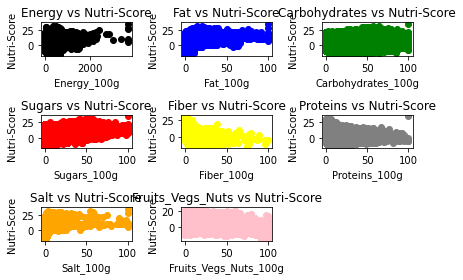

In [4]:
# Nous traçons la contenu de chaque ingrédient et le Nutri-Score de chaque produit pour comprendre leur influence

fig = plt.figure()

ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax1.scatter(data_app['energy-kcal_100g'], score_list['nutri_score'], color='black')
ax1.set_title('Energy vs Nutri-Score')
ax1.set_xlabel('Energy_100g')
ax1.set_ylabel('Nutri-Score')

ax2.scatter(data_app['saturated-fat_100g'], score_list['nutri_score'], color='blue')
ax2.set_title('Fat vs Nutri-Score')
ax2.set_xlabel('Fat_100g')
ax2.set_ylabel('Nutri-Score')

ax3.scatter(data_app['carbohydrates_100g'], score_list['nutri_score'], color='green')
ax3.set_title('Carbohydrates vs Nutri-Score')
ax3.set_xlabel('Carbohydrates_100g')
ax3.set_ylabel('Nutri-Score')

ax4.scatter(data_app['sugars_100g'], score_list['nutri_score'], color='red')
ax4.set_title('Sugars vs Nutri-Score')
ax4.set_xlabel('Sugars_100g')
ax4.set_ylabel('Nutri-Score')

ax5.scatter(data_app['fiber_100g'], score_list['nutri_score'], color='yellow')
ax5.set_title('Fiber vs Nutri-Score')
ax5.set_xlabel('Fiber_100g')
ax5.set_ylabel('Nutri-Score')

ax6.scatter(data_app['proteins_100g'], score_list['nutri_score'], color='grey')
ax6.set_title('Proteins vs Nutri-Score')
ax6.set_xlabel('Proteins_100g')
ax6.set_ylabel('Nutri-Score')

ax7.scatter(data_app['salt_100g'], score_list['nutri_score'], color='orange')
ax7.set_title('Salt vs Nutri-Score')
ax7.set_xlabel('Salt_100g')
ax7.set_ylabel('Nutri-Score')

ax8.scatter(data_app['fruits-vegetables-nuts-estimate_100g'], score_list['nutri_score'], color='pink')
ax8.set_title('Fruits_Vegs_Nuts vs Nutri-Score')
ax8.set_xlabel('Fruits_Vegs_Nuts_100g')
ax8.set_ylabel('Nutri-Score')

plt.rcParams["figure.figsize"] = (30, 20)
plt.tight_layout()

En consultant ces graphes, nous constatons qu'il est difficile de comprendre la correlation entre l'ingrédient et le produit. De ce fait, nous ferons une correlation Pearson pour mieux comprendre leur influence.

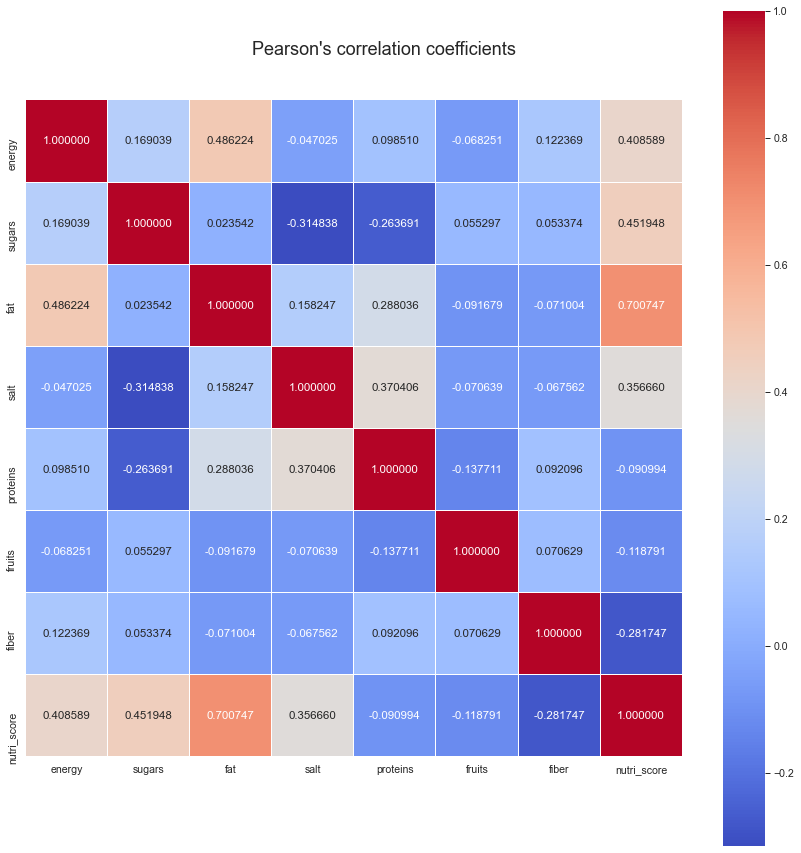

In [5]:
# Pearsons correlation des variables nutritionelles et leur Nutri-Score 

sns.set(context = "paper", font_scale = 1.2)
corrmat = score_list.corr()
f, ax = plt.subplots(figsize = (12, 12))
f.text(0.45, 0.93, "Pearson's correlation coefficients", ha = 'center', fontsize = 18)
sns.heatmap(corrmat, square = True, linewidths = 0.01, annot = True, fmt="f", cmap = "coolwarm")
plt.tight_layout()

La correlation Pearon montre l'impact sur le Nutri-Score des produits. Une correlation négative indique qu'ils ont une influence négative sur le Nutri-Score. La correlation de chaque variable sur le nutri-score est:

* fiber_100g (-0.28)
* fruits_vegetables_nuts_estimate_100g (-0.12)
* proteins_100g (-0.09)
* salt_100g (0.36)
* energy_kcal_100g (0.41)
* sugars_100g (0.45)
* saturated_fat_100g (0.70)

Nous ferons une analyse ANOVA pour confirmer la correlation entre l'ingrédient et le Nutri-Score.

In [6]:
# ANOVA entre chaque ingrédient et le nutri_score

def eta_squared(x,y):
    mean_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni':len(yi_classe), 'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-mean_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-mean_y)**2 for c in classes])
    return SCE/SCT

anova = pd.DataFrame(columns = ['eta_squared'])
numerical_columns = ['energy', 'fat','sugars',
                     'fiber', 'proteins', 'salt', 'fruits']

for col in numerical_columns:
    anova.loc[col] = eta_squared(score_list['nutri_score'], score_list[col])

sorted_anova = anova.sort_values(by = 'eta_squared', ascending = True)

sorted_anova

,eta_squared
fruits,0.063450
proteins,0.177671
salt,0.212157
fiber,0.232517
sugars,0.302446
energy,0.309946
fat,0.559899


Nous ne trouvons pas la même correlation entre les ingrédients et le Nutri-Score. C'est dû à la différence entre les méthodes statistiques. Par contre, nous trouvons qu'il vaut mieux éviter les produits qui contiennent beaucoup de la graisse, du sucre et de l'énergie calorifique.

Maintenant, nous allons traçer le nombre de produits par Nutri-Grade pour chaque catégorie.

In [7]:
# Nombre de produits par Nutri-Grade pour chaque catégorie

nutri_grade_counts = score_list.groupby(['pnns_groups_2', 'nutri_grade']).size().reset_index(name = 'counts')
a = nutri_grade_counts.sort_values(by = 'pnns_groups_2', ascending = True)
nutri_grade_counts

,pnns_groups_2,nutri_grade,counts
0,Alcoholic beverages,B,1965
1,Alcoholic beverages,C,70
2,Alcoholic beverages,D,28
3,Alcoholic beverages,E,61
4,Appetizers,B,847
...,...,...,...
148,Vegetables,B,3093
149,Vegetables,C,3115
150,Vegetables,D,1834
151,Vegetables,E,203


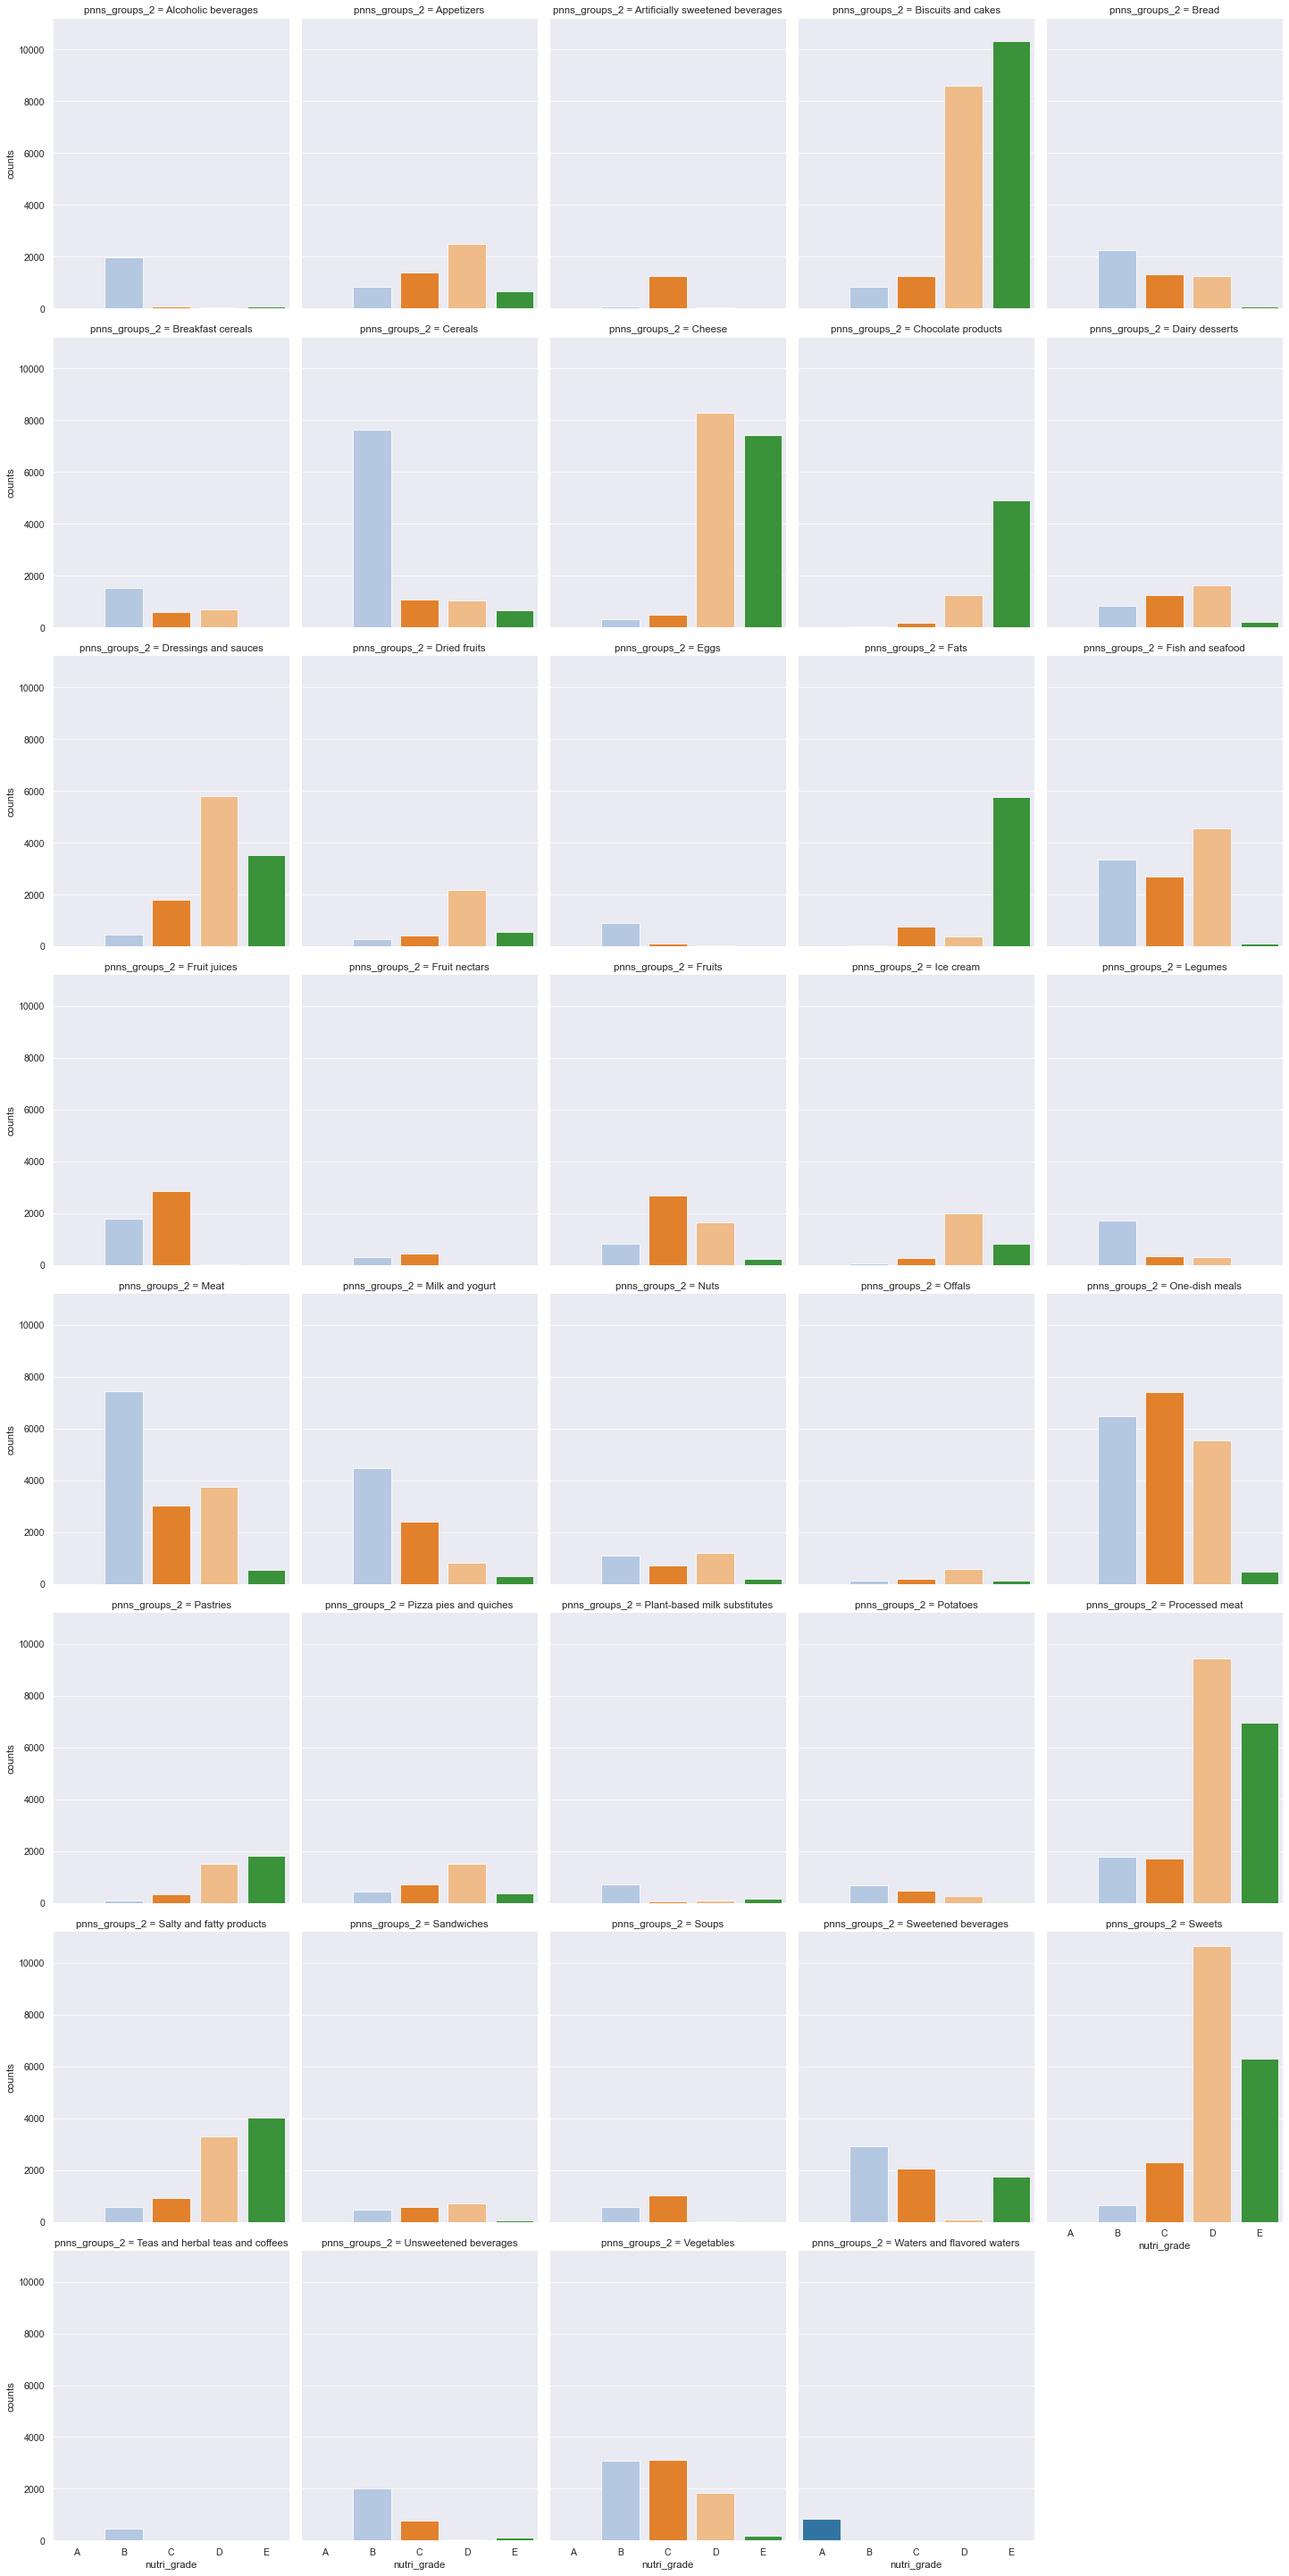

In [8]:
# Distribution du Nutri-Grade de chaque catégorie

category_order = ['A', 'B', 'C', 'D', 'E']

sns.catplot(x = 'nutri_grade', y = 'counts', data = nutri_grade_counts, kind = 'bar', order = category_order, 
            col = "pnns_groups_2", col_wrap = 5, ci = None, height = 5, aspect = 0.8, palette = 'tab20');

Afin de voir les différentes fonctionnalités, nous allons voir 3 exemples de différents clients. Ces clients souhaitent utiliser l'application de manières différentes.

<h3>Exemple 1:</h3>

Gabriel souhaite utiliser l'application NutriCHOICE afin de chercher des produits avec le meilleur Nutri-Score. En particulier, il est allergique aux produits laitiers. Il compte utiliser cette application afin d'éviter les produits qui contiennent du lait. De plus, pour son régime, il souhaite éviter les produits qui contient du sel. Dans cet exemple, il cherche à achèter des biscuits. Il utilise l'application afin d'avoir le meilleur produit. Gabriel souhaite avoir 15 suggestions de produits.

In [9]:
# Un nouveau dataframe qui contient que des produits "Biscuits and cakes" est créé

biscuit = score_list[score_list['pnns_groups_2'] == 'Biscuits and cakes']
biscuit

,code,product_name,brands,allergens,additives,pnns_groups_2,energy,sugars,fat,salt,proteins,fruits,fiber,nutri_score,nutri_grade
2,0000000001281,Tarte noix de coco,"Crous Resto',Crous",-,-,Biscuits and cakes,1,4,10,0,2,0,4,9,D
38,0000023019027,Donuts fourrage vanille,-,-,-,Biscuits and cakes,1,3,9,3,2,0,0,14,E
39,0000023375734,Donut's nature sucre,-,-,-,Biscuits and cakes,1,3,0,7,3,0,0,8,D
43,0000034054086,Kitkat White Wafers,-,-,-,Biscuits and cakes,0,4,0,0,1,0,0,3,D
60,0000069068768,Babas au rhum,-,-,-,Biscuits and cakes,0,3,7,0,1,0,0,9,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252191,990530101029435828,Bio cookies,Griesson,-,-,Biscuits and cakes,1,7,8,2,4,0,3,11,E
252204,9940059200055,Les p'tits DONUTS,-,-,-,Biscuits and cakes,0,0,0,8,0,0,0,8,D
252206,9947014,Brownie Sports avec pépites de chocolat,-,-,-,Biscuits and cakes,1,8,4,1,5,0,0,9,D
252210,9950331221005,"Préparation Pour Tarte, Poire - Chocolat",-,-,-,Biscuits and cakes,0,3,6,0,1,0,0,8,D


In [10]:
# Ce dataframe contient tous les produits qui contient du lait

biscuit_lait = biscuit[biscuit['allergens'].str.contains('milk|lait')]
biscuit_lait

,code,product_name,brands,allergens,additives,pnns_groups_2,energy,sugars,fat,salt,proteins,fruits,fiber,nutri_score,nutri_grade
78,000010,Gelée de fleurs de sureau,Bijou,"en:eggs,en:gluten,en:milk","en:e422,en:e450,en:e471,en:e500,en:e503",Biscuits and cakes,1,5,2,3,3,0,1,7,D
94,000030,Confiture d'oranges,Bijou,"en:eggs,en:gluten,en:milk","en:e422,en:e450,en:e471,en:e500,en:e503",Biscuits and cakes,1,6,2,0,3,0,1,5,D
101,000050,Financiers aux Amandes,Bijou,"en:eggs,en:gluten,en:milk,en:nuts","en:e422,en:e450,en:e500",Biscuits and cakes,1,8,0,2,0,0,1,10,D
106,000051,Fondants Citron,Bijou,"en:eggs,en:gluten,en:milk,en:nuts","en:e100,en:e330,en:e332,en:e401,en:e422,en:e45...",Biscuits and cakes,1,8,0,3,5,0,2,5,D
152,00011679,Cookies Belgian chocolate chunk,Marks & Spencer,en:milk,"en:e322,en:e322i,en:e450,en:e500,en:e500ii,en:...",Biscuits and cakes,1,8,10,0,3,0,0,16,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251678,93269100,Tim Tam Original,ARNOTTS,"en:gluten,en:milk,en:soybeans","en:e120,en:e150,en:e160b,en:e162,en:e322,en:e3...",Biscuits and cakes,1,9,10,0,2,0,0,18,E
251679,9329018033604,40 % Choc chip,The Happy Cookies Co,"en:gluten,en:milk,en:soybeans","en:e170,en:e223,en:e270,en:e304,en:e322,en:e45...",Biscuits and cakes,1,8,10,2,2,0,0,19,E
251765,9403110063544,Tasti Meganuts Nut Bar Caramel 240g,-,"en:gluten,en:milk,en:peanuts,en:soybeans,en:su...","en:e322,en:e322i,en:e422",Biscuits and cakes,1,4,7,0,5,0,0,7,D
251831,9416352008136,Manuka Honey Shortbread,River Mill,"en:gluten,en:milk",-,Biscuits and cakes,1,5,10,0,3,0,0,13,E


In [11]:
# Nous supprimons les produits qui contiennent du lait du dataframe "biscuit"

biscuit = biscuit.drop(biscuit_lait.index)
biscuit = biscuit.reset_index(drop = True)
biscuit

,code,product_name,brands,allergens,additives,pnns_groups_2,energy,sugars,fat,salt,proteins,fruits,fiber,nutri_score,nutri_grade
0,0000000001281,Tarte noix de coco,"Crous Resto',Crous",-,-,Biscuits and cakes,1,4,10,0,2,0,4,9,D
1,0000023019027,Donuts fourrage vanille,-,-,-,Biscuits and cakes,1,3,9,3,2,0,0,14,E
2,0000023375734,Donut's nature sucre,-,-,-,Biscuits and cakes,1,3,0,7,3,0,0,8,D
3,0000034054086,Kitkat White Wafers,-,-,-,Biscuits and cakes,0,4,0,0,1,0,0,3,D
4,0000069068768,Babas au rhum,-,-,-,Biscuits and cakes,0,3,7,0,1,0,0,9,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15098,990530101029435828,Bio cookies,Griesson,-,-,Biscuits and cakes,1,7,8,2,4,0,3,11,E
15099,9940059200055,Les p'tits DONUTS,-,-,-,Biscuits and cakes,0,0,0,8,0,0,0,8,D
15100,9947014,Brownie Sports avec pépites de chocolat,-,-,-,Biscuits and cakes,1,8,4,1,5,0,0,9,D
15101,9950331221005,"Préparation Pour Tarte, Poire - Chocolat",-,-,-,Biscuits and cakes,0,3,6,0,1,0,0,8,D


Maintenant, l'aplication peut suggérer au client le top 'n' meilleurs produits classé par leur Nutri-Score.

In [12]:
# Le dataframe "choix_gabriel" présente les meilleurs 25 produits classé par leur Nutri-Score et leur contenu du sel

choix_gabriel = biscuit.sort_values(by = ['nutri_score', 'salt'], ascending = (True, True)).head(15)
choix_gabriel

,code,product_name,brands,allergens,additives,pnns_groups_2,energy,sugars,fat,salt,proteins,fruits,fiber,nutri_score,nutri_grade
4194,3229820785639,Barre de son d'avoine saveur amande Gayelord H...,Gayelord Hauser,-,en:e422,Biscuits and cakes,0,0,0,0,5,0,5,-10,B
13376,55600380898829,zero cookie chocolat blanc framboise,Prozis,-,-,Biscuits and cakes,0,0,0,0,5,0,5,-10,B
13381,5600380898829,Zero cookie,prozis,-,"en:e202,en:e211,en:e330,en:e968",Biscuits and cakes,0,0,0,0,5,0,5,-10,B
3403,3175681257528,Sablés Pavot Coco,"Gerblé Bio,Gerblé",en:gluten,"en:e330,en:e500",Biscuits and cakes,1,0,0,0,5,0,5,-9,B
5056,3258260004734,Supermix apero,Biodyne,-,"en:e410,en:e412",Biscuits and cakes,1,0,0,0,5,0,5,-9,B
7999,3465511460502,Barre de céréales germées,Germline,-,-,Biscuits and cakes,1,0,0,0,5,0,5,-9,B
11434,3760151013966,Biscuit son d'avoine et graine de chia,Dukan,-,-,Biscuits and cakes,1,0,0,0,5,0,5,-9,B
11439,3760151014260,Biscuits au pur son d'avoine graines et fleur ...,Dukan,-,"en:e503,en:e953,en:e965,en:e968",Biscuits and cakes,1,0,0,0,5,0,5,-9,B
12724,5024278001854,Barres NINE Cacao & Framboise,Nine,en:sesame-seeds,"en:e322,en:e322i",Biscuits and cakes,1,0,0,0,5,0,5,-9,B
13383,5600499505205,The bonbomb,Prozis,-,-,Biscuits and cakes,1,0,0,0,5,0,5,-9,B


<h3>Exemple 2:</h3>

Louise fait ses courses au supermarché "Auchan". Compte tenu du fait qu'il y a beaucoup des produits au Auchan, elle souhaite utiliser l'application pour suggèrer des produits. Dans cet exemple, elle utilise l'application NutriCHOICE pour trouver des suggestions de soupes à achèter à l'Auchan. Louise souhaite avoir 5 suggestions de produits.

In [13]:
# Choisissons les produits du supermarché 'Auchan'

auchan = score_list[score_list['brands'] == 'Auchan']
auchan

,code,product_name,brands,allergens,additives,pnns_groups_2,energy,sugars,fat,salt,proteins,fruits,fiber,nutri_score,nutri_grade
2792,01177473,Lait Bourgeon entier (Suisse) avec 3.8% au min...,Auchan,-,"en:e306,en:e322,en:e322i,en:e471",Cereals,1,0,0,0,0,0,0,1,C
3330,0200709073866,Brandade de morue parmentière fraîche,Auchan,"en:fish,en:milk",-,One-dish meals,0,0,0,3,4,0,0,-1,B
3956,0202332027551,Tartelette aux Pommes,Auchan,"en:eggs,en:milk","en:e1520,en:e263,en:e330,en:e333,en:e333i,en:e...",Biscuits and cakes,0,1,5,0,1,0,0,5,D
4476,0203601016405,Donut,Auchan,"en:milk,en:soybeans","en:e120,en:e14xx,en:e172,en:e172ii,en:e202,en:...",Biscuits and cakes,1,4,9,3,3,0,2,12,E
4502,0203727018178,Chipolata,Auchan,-,-,Processed meat,0,0,8,10,5,0,0,13,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244828,8437005346123,Turron De Fruta,Auchan,-,-,Sweets,1,10,0,0,4,0,0,7,D
245728,8480029253588,Queso Curado,Auchan,-,-,Cheese,1,0,10,10,5,0,0,16,E
245758,8539671022131,fromage blanc 0%,Auchan,en:milk,-,Dairy desserts,0,0,0,0,0,0,0,0,C
247567,8712000051174,Pizza reine,Auchan,"en:gluten,en:milk","en:e250,en:e270,en:e300,en:e316,en:e330,en:e45...",Pizza pies and quiches,0,0,3,5,5,0,0,3,D


In [14]:
# Soupes à la disposition de Louise pour choisir 

soupes = auchan[auchan['pnns_groups_2'] == 'Soups']
soupes

,code,product_name,brands,allergens,additives,pnns_groups_2,energy,sugars,fat,salt,proteins,fruits,fiber,nutri_score,nutri_grade
83528,3254560094338,Velouté de 10 légumes,Auchan,"en:celery,en:milk",en:e14xx,Soups,0,0,0,3,0,0,1,2,C
83529,3254560094413,Velouté de tomates,Auchan,en:milk,en:e14xx,Soups,0,0,0,3,0,1,0,2,C
169602,3596710022557,Mouliné de légumes variés,Auchan,"en:celery,en:milk",-,Soups,0,0,0,3,0,0,1,2,C
169641,3596710056286,Velouté de Potiron,Auchan,-,en:e14xx,Soups,0,0,0,3,0,0,1,2,C
169699,3596710081783,Mouliné de légumes variés,Auchan,-,-,Soups,0,0,0,3,0,0,1,2,C
169881,3596710207787,Velouté de Potiron 2x30cl,Auchan,en:milk,en:e14xx,Soups,0,0,0,3,0,0,1,2,C
169882,3596710207794,Velouté de tomates,Auchan,-,en:e14xx,Soups,0,0,0,3,0,0,0,3,C
170927,3596710356614,Velouté Saveurs du soleil,Auchan,-,-,Soups,0,0,0,2,0,0,1,1,B
170928,3596710356621,Velouté de légumes bio,Auchan,en:celery,-,Soups,0,0,0,2,0,0,1,1,B
171050,3596710363841,Gaspacho,Auchan,en:milk,-,Soups,0,0,0,3,0,0,1,2,C


In [15]:
# Le dataframe "choix_louise" présente les meilleurs produits classé par leur Nutri-Score

choix_louise = soupes.sort_values(by ='nutri_score', ascending = True).head(5)
choix_louise

,code,product_name,brands,allergens,additives,pnns_groups_2,energy,sugars,fat,salt,proteins,fruits,fiber,nutri_score,nutri_grade
173985,3596710458554,Velouté de petits pois ricotta,Auchan,en:milk,en:e14xx,Soups,0,0,0,2,1,0,1,0,B
172227,3596710411603,Soupe Minestrone avec une pointe de basilic,Auchan,"en:celery,en:eggs,en:gluten",en:e14xx,Soups,0,0,0,2,1,0,1,0,B
172714,3596710427956,Velouté de Tomates,Auchan,"en:milk,en:soybeans",en:e14xx,Soups,0,0,0,2,0,2,0,0,B
170928,3596710356621,Velouté de légumes bio,Auchan,en:celery,-,Soups,0,0,0,2,0,0,1,1,B
175370,3596710741618,Mouliné de légumes variés,Auchan,"en:celery,en:milk","en:e14xx,en:e160a,en:e160ai",Soups,0,0,0,2,0,1,0,1,B


<h3>Exemple 3:</h3>

Emma est dans le magasin 'U'. Elle a choisi une pizza aléatoirement du magasin. Elle utilise l'application NutriCHOICE pour voir si il y a des meilleurs alternatives à son produit. Elle prèfere éviter du sucre et de la graisse dans ses produits. Elle souhaite voir une comparaison de son produit avec les autres produits disponibles, surtout les variables concernant le contenu du sucre, du sel et de l'énergie calorifique. Emma souhaite avoir 25 suggestions de produits.

In [16]:
# Produits disponible dans le magasin 'U'

mag_u = score_list[score_list['brands'] == 'U']
mag_u

,code,product_name,brands,allergens,additives,pnns_groups_2,energy,sugars,fat,salt,proteins,fruits,fiber,nutri_score,nutri_grade
4307,0203006005127,Tradigraines,U,"en:gluten,en:sesame-seeds",-,Bread,1,0,4,0,5,0,0,0,C
4545,0203910027222,Selles sur Cher,U,-,en:e153,Cheese,0,0,10,7,5,0,0,12,E
4629,0204145018894,Cote de porc,U,-,-,Meat,0,0,4,3,5,0,0,2,C
4791,0204957013841,Saucisse toulouse,U,-,-,Processed meat,0,0,0,4,0,0,0,4,D
4809,0205012004798,Macédoine de légumes assaisonnée - mayonnaise,U,en:mustard,"en:e14xx,en:e415",One-dish meals,0,0,0,3,1,0,0,2,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227266,6406520722677,lait 1/2 écrémé,U,-,-,Milk and yogurt,0,2,2,1,4,0,0,1,B
227956,723146463483,Fromage frais aux fruits,U,-,-,Dairy desserts,0,1,1,0,1,0,0,1,C
240439,8271771788677,Crème fraiche fluide,U,en:milk,-,Milk and yogurt,0,0,10,3,1,0,0,12,E
243342,8424465820270,Donuts,U,en:milk,"en:e160a,en:e322,en:e450,en:e471,en:e481,en:e500",Biscuits and cakes,1,3,10,0,3,0,0,11,E


In [17]:
# Des produits de la catégorie "Pizzas pies and quiches" disponible dans le magasin 'U'

pizza = mag_u[mag_u['pnns_groups_2'] == 'Pizza pies and quiches']
pizza = pizza.reset_index(drop=True)
pizza

,code,product_name,brands,allergens,additives,pnns_groups_2,energy,sugars,fat,salt,proteins,fruits,fiber,nutri_score,nutri_grade
0,2000000043758,Tarte légumes du soleil,U,"en:gluten,en:milk",-,Pizza pies and quiches,0,0,1,4,2,0,2,1,C
1,2000000239156,Pizza saumon,U,-,-,Pizza pies and quiches,0,0,2,5,5,0,0,2,C
2,2000000918112,Tartelette citron,U,-,"en:e322,en:e331",Pizza pies and quiches,1,10,0,8,3,0,5,11,E
3,3256220017961,"Pizza à partager, Jambon Fromage (cheddar, eda...",U,-,"en:e14xx,en:e250,en:e301,en:e450,en:e451",Pizza pies and quiches,0,0,0,5,5,0,1,-1,B
4,3256220866842,Pâte à tarte feuilletée pur beurre bio,U,"en:gluten,en:milk",-,Pizza pies and quiches,1,0,10,0,3,0,0,8,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,3368954216265,Pizza 4 formaggi saveurs,U,"en:eggs,en:gluten,en:milk,en:soybeans",-,Pizza pies and quiches,0,0,7,4,5,0,2,4,D
76,3368954216401,Pizza regina à base de jambon cuit champignons...,U,"en:gluten,en:milk","en:e250,en:e301,en:e579",Pizza pies and quiches,0,0,0,4,5,0,2,-3,B
77,3368955800128,Flammekueche recette alsacienne saveurs,U,"en:gluten,en:milk","en:e14xx,en:e250,en:e301,en:e392,en:e412,en:e4...",Pizza pies and quiches,0,0,4,0,5,0,2,-3,B
78,3368957531631,La 4 formaggi,U,"en:gluten,en:milk","en:e1105,en:e202",Pizza pies and quiches,0,0,6,0,5,0,2,-1,B


In [18]:
# Emma fait son choix de Pizza

emma_choix = pizza.sample()
nom_pizza_choisie = emma_choix['product_name'].values[0]
nom_pizza_choisie

'Flammekueche recette alsacienne saveurs'

In [19]:
# thresh_1, thresh_2 et thresh_3 sont les contenus du sucre, du sel et de l'énergie calorifique

data_pizza_compare = data_app[data_app['pnns_groups_2'] == 'Pizza pies and quiches']
data_pizza_compare = data_pizza_compare[data_pizza_compare['brands'] == 'U']
data_pizza_compare = data_pizza_compare.reset_index(drop = True)

thresh_1 = data_pizza_compare.loc[(data_pizza_compare['product_name'] ==  nom_pizza_choisie), 'sugars_100g'].iloc[0]
thresh_2 = data_pizza_compare.loc[(data_pizza_compare['product_name'] ==  nom_pizza_choisie), 'salt_100g'].iloc[0]
thresh_3 = data_pizza_compare.loc[(data_pizza_compare['product_name'] ==  nom_pizza_choisie), 'energy-kcal_100g'].iloc[0]

<ipython-input-20-f1b817b2a5ff>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


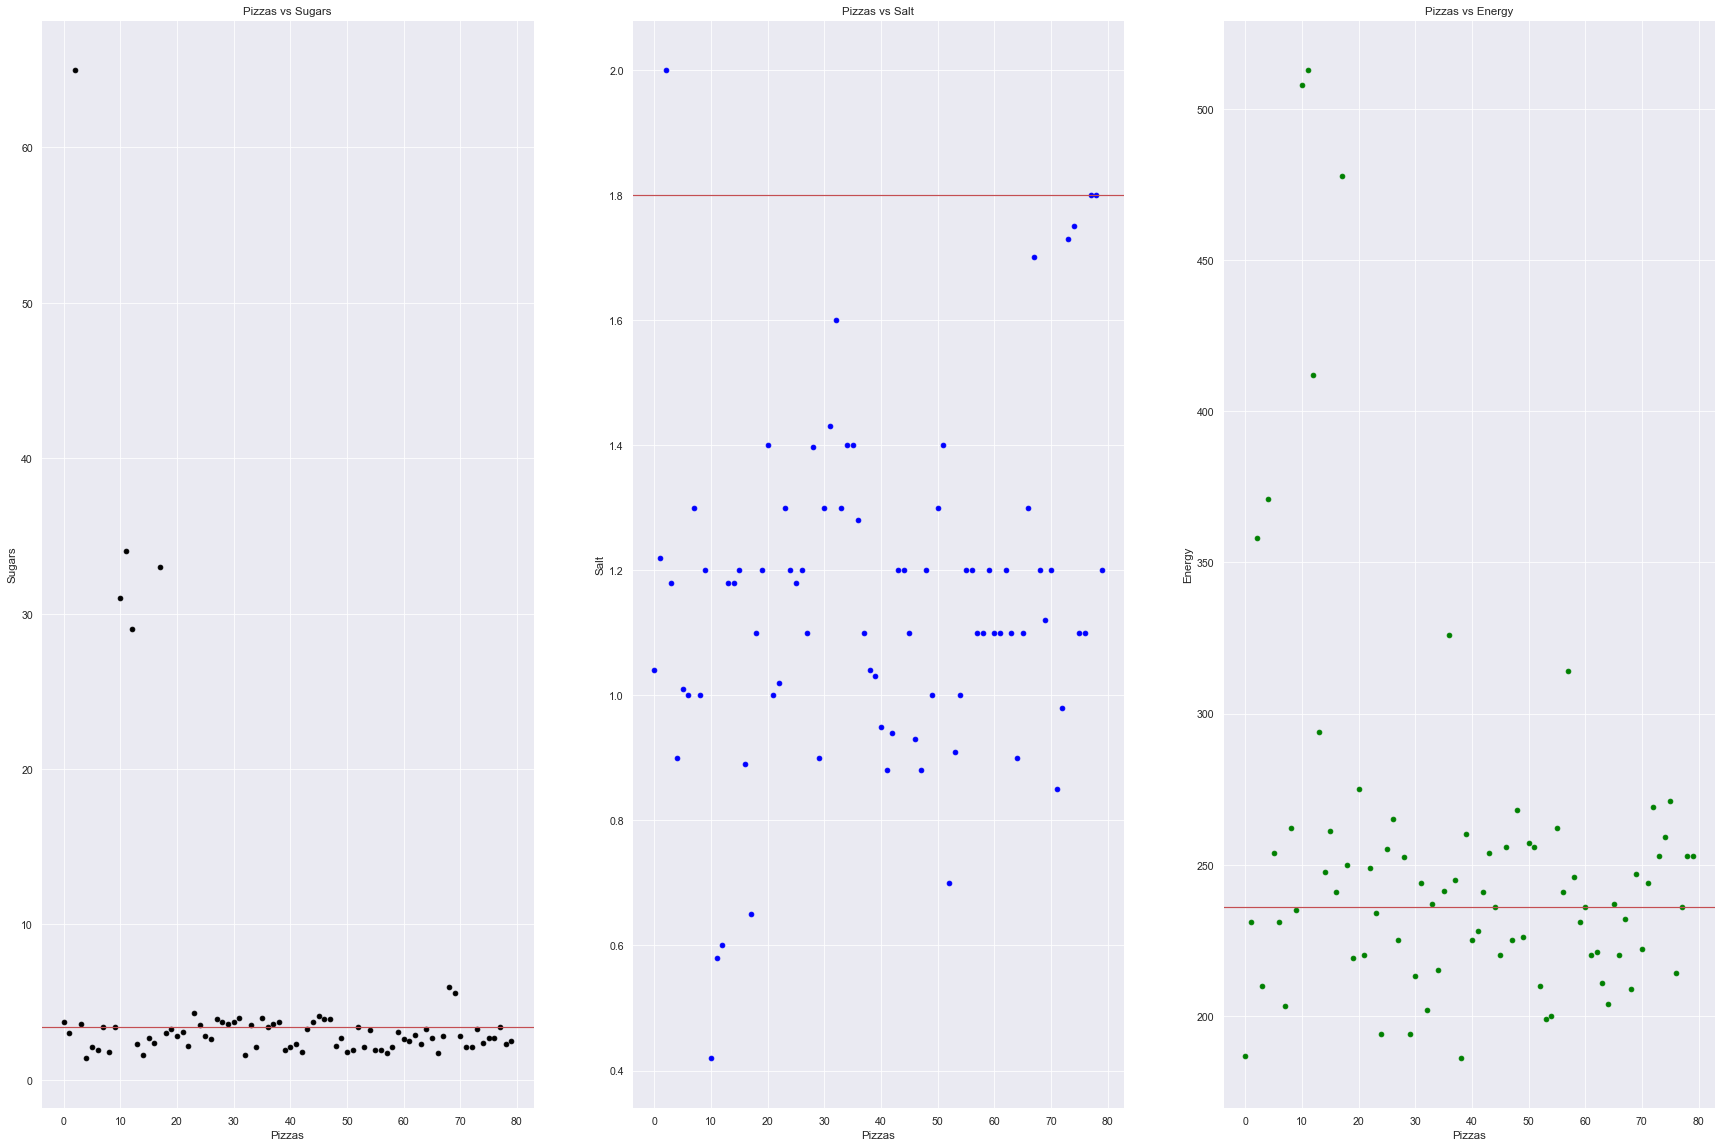

In [20]:
# Visualisation des comparaisons souhaitées par Emma

fig = plt.figure()
ax_1 = fig.add_subplot(131)
ax_2 = fig.add_subplot(132)
ax_3 = fig.add_subplot(133)

ax_1.scatter(data_pizza_compare.index, data_pizza_compare['sugars_100g'], color='black')
ax_1.set_title('Pizzas vs Sugars')
ax_1.set_xlabel('Pizzas')
ax_1.set_ylabel('Sugars')
ax_1.axhline(y = thresh_1, color='r', linestyle='-')

ax_2.scatter(data_pizza_compare.index, data_pizza_compare['salt_100g'], color='blue')
ax_2.set_title('Pizzas vs Salt')
ax_2.set_xlabel('Pizzas')
ax_2.set_ylabel('Salt')
ax_2.axhline(y = thresh_2, color='r', linestyle='-')

ax_3.scatter(data_pizza_compare.index, data_pizza_compare['energy-kcal_100g'], color='green')
ax_3.set_title('Pizzas vs Energy')
ax_3.set_xlabel('Pizzas')
ax_3.set_ylabel('Energy')
ax_3.axhline(y = thresh_3, color='r', linestyle='-')
fig.show()

In [21]:
# Produits suggérés à Emma

choix_emma = pizza.sort_values(by ='nutri_score', ascending = True).head(25)
choix_emma

,code,product_name,brands,allergens,additives,pnns_groups_2,energy,sugars,fat,salt,proteins,fruits,fiber,nutri_score,nutri_grade
35,3256224763086,Mini pizza edam jambon cuit,U,"en:gluten,en:milk","en:e250,en:e301,en:e392",Pizza pies and quiches,0,0,0,0,5,0,2,-7,B
64,3256227102011,Pizza à partager poulet barbecue,U,"en:gluten,en:milk","en:e14xx,en:e260,en:e407,en:e450,en:e450i,en:e...",Pizza pies and quiches,0,0,1,0,5,0,1,-5,B
41,3256225425099,Pizza Pommes de terre reblochon AOP savoyarde ...,U,"en:gluten,en:milk","en:e14xx,en:e160b,en:e450,en:e450i,en:e500",Pizza pies and quiches,0,0,0,3,5,0,2,-4,B
34,3256224755654,Pizza jambon fromages,U,"en:gluten,en:milk","en:e14xx,en:e250,en:e301",Pizza pies and quiches,0,0,3,0,5,0,2,-4,B
77,3368955800128,Flammekueche recette alsacienne saveurs,U,"en:gluten,en:milk","en:e14xx,en:e250,en:e301,en:e392,en:e412,en:e4...",Pizza pies and quiches,0,0,4,0,5,0,2,-3,B
29,3256224706021,Tarte aux poireaux,U,"en:eggs,en:gluten,en:milk",-,Pizza pies and quiches,0,0,0,0,2,0,1,-3,B
76,3368954216401,Pizza regina à base de jambon cuit champignons...,U,"en:gluten,en:milk","en:e250,en:e301,en:e579",Pizza pies and quiches,0,0,0,4,5,0,2,-3,B
20,3256224059738,Pizza au chorizo d'Espagne,U,en:milk,"en:e1400,en:e250,en:e316,en:e325,en:e500,en:e579",Pizza pies and quiches,0,0,4,0,5,0,2,-3,B
44,3256225734542,Pizza bolognaise au boeuf,U,en:milk,en:e500,Pizza pies and quiches,0,0,0,5,5,0,2,-2,B
52,3256226752644,Pizza extra américaine barbecue,U,"en:gluten,en:milk","en:e14xx,en:e250,en:e260,en:e316,en:e330,en:e4...",Pizza pies and quiches,0,0,2,3,5,0,2,-2,B


<h1><center>Conclusion</center></h1>

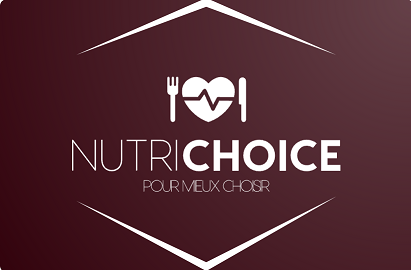

Donc, comme montré par ces 3 exemples, l'application NutriCHOICE est capable de répondre aux différents besoins des clients. Avec les données à disposition, nous sommes capable d'avoir une application fonctionnel. Actuellement, l'application peut prendre en compte des préférences comme:

1) Allergens,

2) Additives,

3) Magasins,

4) Nombre de produits à suggérer.

En fonction du besoin des clients, des autres préférences peuvent être ajouté à l'application éventuellement. De plus, la l'application deviendra plus attirant aux clients si plus des produits sont à leur disposition.

Les potentiels inconvénients de l'application sont les outliers et les données non vérifiées. Ces données non vérifées peuvent poser un grand problème surtout pour les allergens dans chaque produit.

**************